In [126]:
from ruamel.yaml import YAML
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1.3. Repaso de funciones

In [127]:
def convertir_array(archivo:str):

    archivo = open(archivo, 'r')
    yaml = YAML()
    data = yaml.load(archivo)
    datos=data["DATA"][0]['data'].strip().split('\n')
    array = []
    for i in range(0,len(datos)):
        tupla = datos[i].strip().split(' ')
        par = []
        for j in range(0,len(tupla)):
            par.append(float(tupla[j]))
        array.append(tuple(par))
    return array


1.4. Índice de refracción de un plástico y un adhesivo óptico

In [128]:
def grafico_ni(archivo:str, material:str):
    d=convertir_array(archivo)
    x = []
    y = []
    for i in range(len(d)):
        x.append(d[i][0])
        y.append(d[i][1])
    promedio_y = np.mean(y)
    desviacion_estandar_y = np.std(y)
    plt.plot(x,y)
    plt.xlabel('longitud de onda')
    plt.ylabel('índice de refracción')
    plt.title(material)
    plt.axhline(promedio_y, color='red', linestyle='--', label=f'Promedio = {promedio_y:.2f}')
    plt.axhline(promedio_y + desviacion_estandar_y, color='green', linestyle='--', label=f'Std Dev + = {desviacion_estandar_y:.2f}')
    plt.axhline(promedio_y - desviacion_estandar_y, color='green', linestyle='--', label=f'Std Dev - = {desviacion_estandar_y:.2f}')
    plt.legend()
    plt.show()

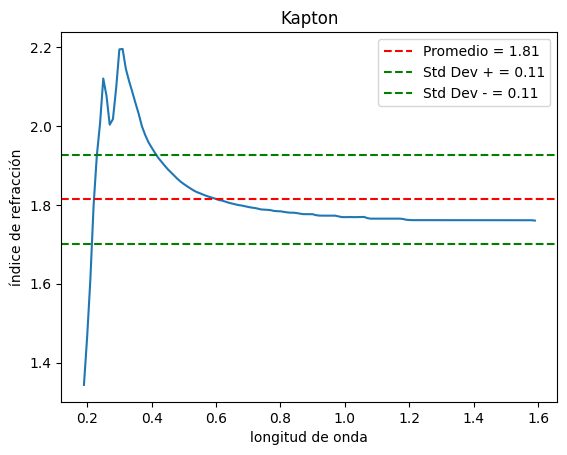

In [129]:
grafico_ni("./Plásticos Comerciales/Kapton.yml", 'Kapton')

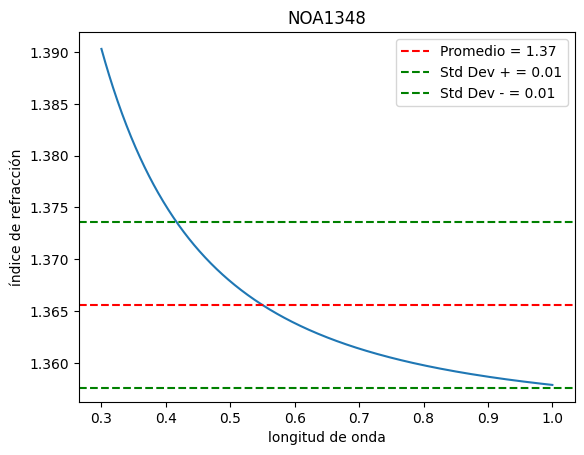

In [130]:
grafico_ni("./Adhesivos Ópticos/NOA1348.yml", 'NOA1348')

1.5. Gráficas de índice de refracción y longitud de onda.

In [131]:
def grafico_long_vs_ind(archivo:str, material:str):
    d=convertir_array(archivo)
    x = []
    y = []
    for i in range(len(d)):
        x.append(d[i][0])
        y.append(d[i][1])
    promedio_y = np.mean(y)
    desviacion_estandar_y = np.std(y)
    plt.plot(x,y)
    plt.xlabel('longitud de onda')
    plt.ylabel('índice de refracción')
    plt.title(material)
    plt.axhline(promedio_y, color='red', linestyle='--', label=f'Promedio = {promedio_y:.2f}')
    plt.axhline(promedio_y + desviacion_estandar_y, color='green', linestyle='--', label=f'Std Dev + = {desviacion_estandar_y:.2f}')
    plt.axhline(promedio_y - desviacion_estandar_y, color='green', linestyle='--', label=f'Std Dev - = {desviacion_estandar_y:.2f}')
    plt.legend()
    plt.savefig(archivo.replace(".yml", '.png'))
    plt.show()

In [132]:
def crear_imgs(archivo:str):
    df = pd.read_csv(archivo)
    for indice, fila in df.iterrows():
        categoria = fila["Categoría"]
        material = fila["Material"]
        grafico_long_vs_ind("./"+ categoria + "/" + material + ".yml", material)